# Business analytics - Fall 2024
Instructor: Dr. Ilia Tetin

## Seminar 1: Simulations in Python

In this seminar, we will discuss how to simulate various random variables in Python  and solve different problems using simulations.

In [88]:
import random
import time
import numpy as np         # library for matrices and mathematics
import pandas as pd        # library for working with tables
from scipy import stats    # module for statistical functions

# Libraries for visualization and plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # you can choose your favorite style for plots
%matplotlib inline

In [89]:
2+2

4

In [90]:
a = [1, 2, 3]
b = [5, 6, 7]
a + b

[1, 2, 3, 5, 6, 7]

In [91]:
3*a

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [92]:
x = np.array(a)
y = np.array([5, 6, 7])


In [93]:
x+y

array([ 6,  8, 10])

In [94]:
3*x

array([3, 6, 9])

### header

write smth $$x^2 = \frac{45}{51}$$

In [95]:
x @ y # x.dot(y)

38

$$ X \sim N(0, 1); X \sim N(\mu, \sigma)$$

In [96]:
norm_rv = stats.norm(loc=0, scale=1)
norm_rv.rvs(1)[0]

-1.1815270577639672

In [97]:
norm_rv.rvs(2)

array([0.56996225, 0.12620173])

In [98]:
np.mean(norm_rv.rvs(10**5)), np.std(norm_rv.rvs(10**5))

(-0.0038162970256421717, 0.9991193172893122)

In [99]:
np.random.seed(111)
vals = norm_rv.rvs(10**5)
vals[:5]


array([-1.13383833,  0.38431919,  1.49655378, -0.3553823 , -0.78753354])

In [100]:
np.var(vals)

0.9918419356890368

In [101]:
np.random.seed(111)
norm_rv1 = stats.norm(loc=2, scale=1)
norm_rv2 = stats.norm(loc=0, scale=2)
print(np.mean(norm_rv1.rvs(10**5)), np.std(norm_rv1.rvs(10**5)))
print(np.mean(norm_rv2.rvs(10**5)), np.std(norm_rv2.rvs(10**5)))


1.9937342414139076 0.9956206594015417
-0.005320368536200199 1.993972755507696


In [102]:
np.linspace(-5, 5, 5)

array([-5. , -2.5,  0. ,  2.5,  5. ])

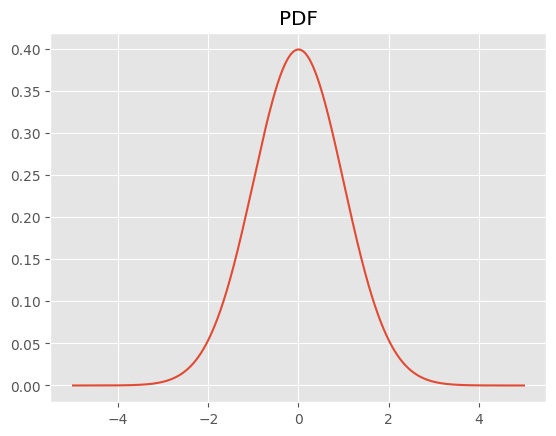

In [105]:
t = np.linspace(-5, 5, 1000)

ft = norm_rv.pdf(t)
plt.plot(t, ft)
plt.title('PDF');

## 1. Warm-up

In the warm-up problems, you can use both classic Python and numpy.

### Problem 1 (Coin Flips)
Oleg and Miron have coins. They flip them and shout "HEADS - TAILS". Oleg's coin comes up heads with a probability of 0.6. Miron's coin comes up heads with a probability of 0.4. Miron and Oleg flip their coins until they get heads.

(a) Use simulations to find the probability that Oleg will make more flips than Miron.


In [142]:
np.random.choice(['head', 'tail'], p=[0.6, 0.4])

'head'

In [143]:
from tqdm.notebook import tqdm

In [146]:
def game():
    oleg_res = 'tail'
    miron_res = 'tail'
    oleg_cnt = 0
    miron_cnt = 0

    while oleg_res == 'tail':
        oleg_res = np.random.choice(['head', 'tail'], p=[0.6, 0.4])
        oleg_cnt += 1

    while miron_res == 'tail':
        miron_res = np.random.choice(['head', 'tail'], p=[0.4, 0.6])
        miron_cnt += 1

    return oleg_cnt, miron_cnt

n_obs = 10**5
oleg_wins = 0
for i in tqdm(range(n_obs)):
    oleg_cnt, miron_cnt = game()
    if oleg_cnt > miron_cnt:
        oleg_wins += 1

print(f'Oleg wins with probability: {oleg_wins / n_obs}')



  0%|          | 0/100000 [00:00<?, ?it/s]

Oleg wins with probability: 0.20896


(b) Let X be the number of flips Miron makes, and Y be the number of flips Oleg makes. Use simulations to find E(X - Y).



### Problem 2 (The Python)

Anatoly the Python loves French baguettes. The length of a French baguette is 1 meter. With each gulp, Anatoly swallows a piece of random length, uniformly distributed over the interval `[0, 1]`. To eat the entire baguette, Anatoly needs a random number `N` of gulps. Use simulations to find `E(N)` and `Var(N)`. This problem is very challenging to solve analytically, but you can give it a try.


In [107]:
stats.uniform.rvs(0, 1, 10)

array([0.20711295, 0.88401574, 0.54826044, 0.3594577 , 0.98121145,
       0.44362411, 0.46978331, 0.39939444, 0.10976764, 0.72919859])

In [ ]:
# -= same as l = l-bite

In [113]:
def bitefun():
    l = 1
    cnt = 0
    while l > 0:
        bite = stats.uniform.rvs(0, 1, 1)
        l -= bite
        cnt += 1
    return cnt

In [124]:
n_obs = 10**5
res = np.zeros(n_obs)
for i in tqdm(range(n_obs)):
    res[i] = bitefun()


  0%|          | 0/100000 [00:00<?, ?it/s]

In [125]:
np.mean(res), np.var(res)

(2.72076, 0.7632450223999999)

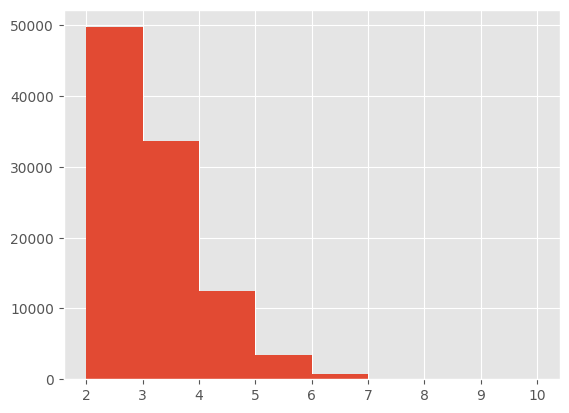

In [126]:
plt.hist(res, bins=8);

In [130]:
np.mean(res==8)

0.00019

### Problem 3 (The Cord)

A cord of length 1 meter is randomly cut in two places. What is the probability that at least one of the resulting pieces will be longer than 0.5 meters?






## 2. Generating Random Variables in Python

Sometimes, to solve probability theory problems or to study the properties of statistical algorithms, you need to generate a random sample from some distribution.

To generate any random variable in Python, you need to do two things:

* Create a generator.

Inside the `scipy.stats` package, there are [many different distributions.](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html)

Among this abundance, you need to find the required distribution and specify its parameters.
Let's do this using the example of a **normal distribution**, X ~ N(μ, σ²).
The density function of this distribution looks like:

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot  e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

The `loc` parameter sets μ, and `scale` sets the standard deviation σ.


In [46]:
norm_rv = stats.norm(loc=0, scale=1)  # create a generator

Once the generator is ready, you can call different methods on it:

* `rvs` will generate a sample from the distribution with the specified `size`.
* `cdf` will compute the value of the cumulative distribution function at a given point.
* `pdf` will compute the value of the probability density function at a given point.
* `ppf` will compute the quantile for a given level.

[In the documentation](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) you can find other methods but we will rarely encounter them throughout our course (see the section on statistical functions).


In [147]:
sample = norm_rv.rvs(1000)  # generate 1000 values
sample[:10]

array([-0.33037699, -1.18192563,  0.65848814, -1.0188199 , -0.67566179,
        0.23859857, -0.60483578,  0.97272825,  1.93125924,  0.01288481])

## 3. Density and Cumulative Distribution Function



Now we can experiment a bit with our random variable. For example, we can find the value of the density function at x = 1: f(1).



In [152]:
norm_rv.pdf(3)

0.0044318484119380075

We can also plot the density function, f(x).



In [49]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

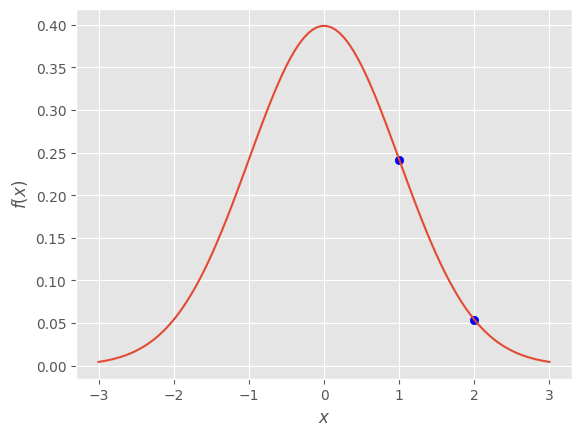

In [50]:
plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# and mark f(1) on the plot
plt.scatter([1,2], [norm_rv.pdf(1), norm_rv.pdf(2)], color="blue");

Let's now find the value of the cumulative distribution function at x = 1:

$$F(1) = P(X \le 1) = \int_{-\infty}^1 f(x)dx$$


In [51]:
norm_rv.cdf(1)

0.8413447460685429

 On the density plot, this appears as the area under the curve up to the point $x = 1$,  which is the probability that $X \le 1$.


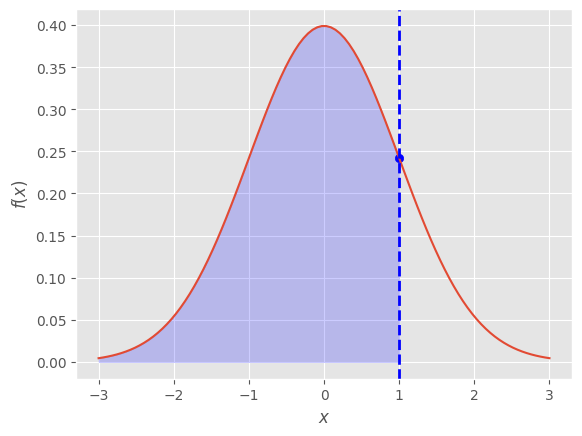

In [52]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Marking f(1) on the plot
plt.scatter([1], [norm_rv.pdf(1)], color="blue");

# Adding a shaded area to the same plot
xq = np.linspace(-3, 1, 100)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2);

We can also plot the cumulative distribution function.


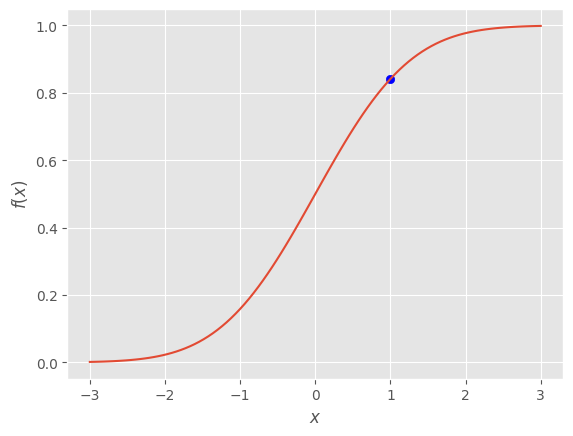

In [53]:
x = np.linspace(-3, 3, 100)
cdf = norm_rv.cdf(x)

plt.plot(x, cdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Marking F(1) on the plot
plt.scatter([1], [norm_rv.cdf(1)], color="blue");

Now let's find another probability:


$$ P(1 < X < 3) = \int_1^3 f(x) dx = F(3) - F(1)$$

In [54]:
norm_rv.cdf(3) - norm_rv.cdf(1)

0.15730535589982697

This is the probability of falling within a specific interval, and we'll visualize it on the density plot.



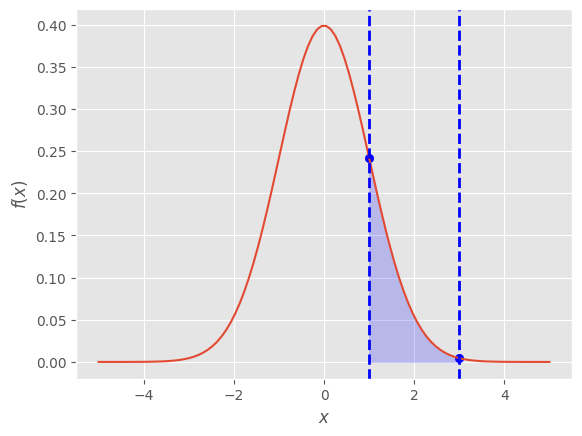

In [55]:
x = np.linspace(-5, 5, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Marking f(1) on the plot
plt.scatter([1, 3], [norm_rv.pdf(1), norm_rv.pdf(3)], color="blue");

# Adding a shaded area to the same plot
xq = np.linspace(1, 3)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2)
plt.axvline(3, color='blue', linestyle="--", lw=2);

For completeness, let's also find a quantile. The quantile at level γ is the number q such that

$$P(X \le q) = \gamma$$

Let's find the 5% quantile and plot it on the density plot:



In [56]:
q = norm_rv.ppf(0.025)
q

-1.9599639845400545

Text(-1.8599639845400544, 0.3349576888171431, '-1.96')

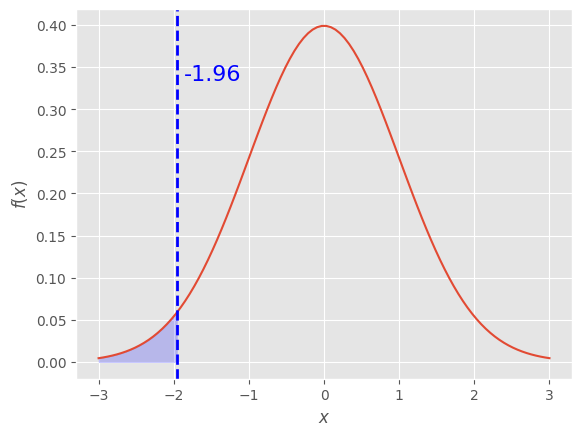

In [57]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

xq = np.linspace(-3, q)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(q, color='blue', linestyle="--", lw=2)

y_max = plt.ylim()[1]
plt.text(q + 0.1, 0.8*y_max, round(q,2), color='blue', fontsize=16)

Note that everything we've done so far has been with a theoretical distribution. You can work with any other distribution in a similar way. For example, with an exponential distribution:

In [58]:
exp_rv = stats.expon(scale=5)
exp_rv.rvs(5)

array([8.34742681, 1.12416251, 2.77050821, 1.53262783, 4.95485611])

## 4. Empirical Distribution

Now let's work with a sample. Usually, we don't know the distribution from which the sample was drawn. We can calculate some characteristics for our random variable.


In [153]:
sample

array([-3.30376994e-01, -1.18192563e+00,  6.58488139e-01, -1.01881990e+00,
       -6.75661786e-01,  2.38598574e-01, -6.04835778e-01,  9.72728253e-01,
        1.93125924e+00,  1.28848073e-02, -5.74680366e-01, -1.03855175e+00,
        1.91957353e+00,  6.27516613e-02,  2.45031429e-01, -1.38896687e+00,
        1.70149475e-01,  1.91059935e-02,  2.30754641e+00, -6.15607364e-01,
       -1.04122555e+00,  8.26190151e-01, -1.79480461e-01, -4.88852820e-01,
        1.74179161e-01,  8.78919519e-01,  1.50256204e+00,  2.95690345e-01,
        2.68126231e+00, -7.65609936e-01, -3.28590101e-01,  6.42588394e-01,
       -9.38974631e-01,  5.37459706e-01,  5.17104185e-01,  4.88332573e-01,
        6.11767600e-01, -1.67291975e-01,  1.41292685e+00,  4.68013001e-01,
        1.14645386e+00, -1.58864939e+00,  1.98755200e+00, -3.89972170e-01,
       -6.48522858e-01,  1.17164228e-01, -2.03537252e+00,  5.17618896e-02,
       -8.85657226e-01, -2.10427316e+00,  4.00576172e-01,  3.47884133e-02,
       -1.61291167e+00,  

In [154]:
sample[:10]

array([-0.33037699, -1.18192563,  0.65848814, -1.0188199 , -0.67566179,
        0.23859857, -0.60483578,  0.97272825,  1.93125924,  0.01288481])

Let's create a histogram. A histogram is an empirical estimate of the distribution's density.


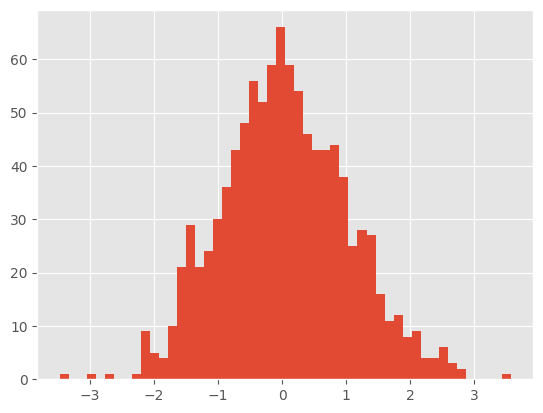

In [156]:
plt.hist(sample, bins=50);

Let's plot the histogram and the density function on the same plot.

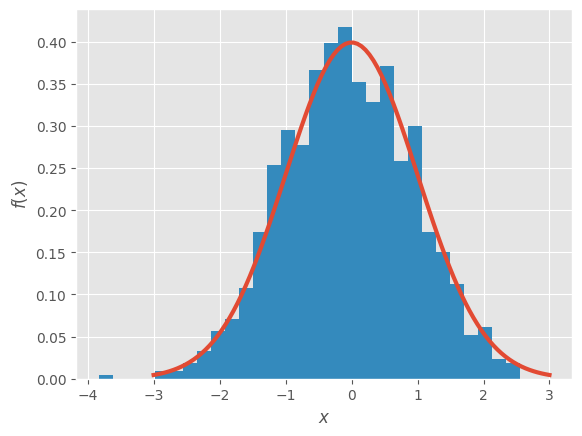

In [61]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

# pdf
plt.plot(x, pdf, lw=3)

# histogram, with density normalized
plt.hist(sample, bins=30, density=True);

plt.ylabel('$f(x)$')
plt.xlabel('$x$');

We can also construct the empirical cumulative distribution function (ECDF).


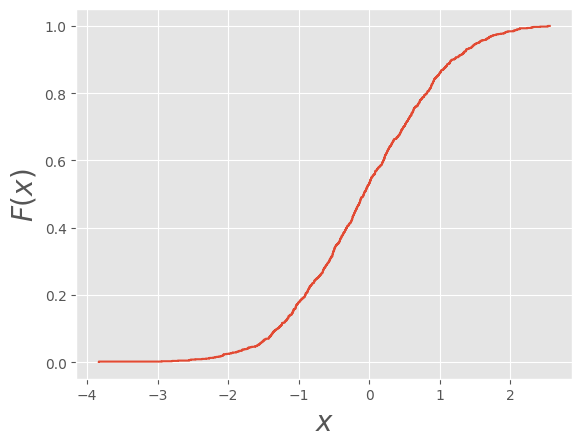

In [62]:
# For building the ECDF, we'll use the statsmodels library.
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(sample)   # Build the empirical CDF from the sample

plt.step(ecdf.x, ecdf.y)
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

We can plot it on the same graph as the theoretical CDF:


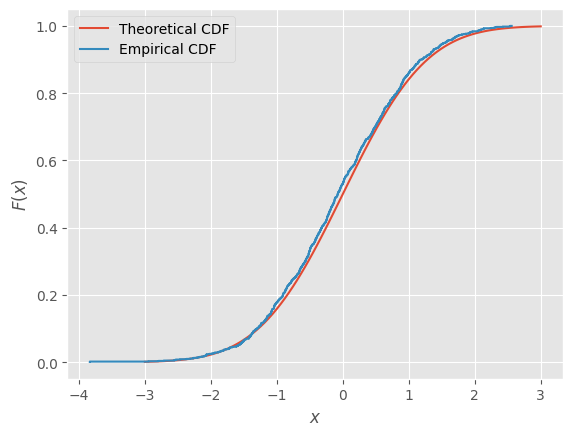

In [63]:
x = np.linspace(-3, 3, 100)

# Theoretical CDF
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='Theoretical CDF')

# Empirical CDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='Empirical CDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

## 5. Generating Samples

With similarly simple manipulations, you can simulate various events. For example, you can generate a sample without replacement from the vector `1:10` of size `5`. All elements will be selected with equal probability.


We will do this using [np.random](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html). Numpy has implemented the simplest generators, and they are usually quite convenient to use.


In [64]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [65]:
np.random.choice(np.arange(1,11), size=5, replace=False)

array([9, 1, 6, 3, 7])

In [66]:
np.random.choice(np.arange(1,11),
                 size=5,
                replace=True) # with replacement

array([6, 3, 7, 2, 6])

You can also set the probabilities of events yourself. Let's, for example, set up a fishing simulation!

In [67]:
np.random.choice(['crucian carp', 'roach', 'pike'],
                 size=10,
                 p=[0.5, 0.2, 0.3])

array(['crucian carp', 'crucian carp', 'roach', 'pike', 'roach',
       'crucian carp', 'crucian carp', 'crucian carp', 'pike',
       'crucian carp'], dtype='<U12')

## 6. Seeds

If you run the command `stats.norm(loc=3, scale=2).rvs(5)` on two different computers or twice on the same one, the results will be different. After all, they are random! :)


In [68]:
rv = stats.norm(loc=3, scale=2)
rv.rvs(5)

array([5.5736842 , 6.20445992, 4.4978751 , 6.96580979, 2.50711644])

In [69]:
stats.norm(loc=3, scale=2).rvs(5)

array([1.84096444, 3.04407465, 1.89114552, 4.53338823, 1.08272226])

However, generating random variables does not contradict the idea of perfectly reproducible research. To get the same results, it is necessary to synchronize the random number generators on these two computers. This is done by setting the random number generator's seed. The seed is also called the starting value. Any integer will work as a seed.


In [70]:
stats.norm(loc=3, scale=2).rvs(5, random_state=111)

array([0.73232333, 3.76863839, 5.99310755, 2.28923541, 1.42493292])

__Guess which numbers are most often used as seeds?__

Many algorithms in data analysis are in some way based on randomness (e.g., the initial weights in training might be drawn from some distribution, or the training might be done on a random subsample). To achieve reproducible, consistent results that don't depend on the run, you need to set the generation seed.

## 7. More Problems!

### Problem 4 (Spam)

> Stars are better seen from the roof,climb up and check it yourself.
> You've been waiting for this sign from above, and you marked it as spam.

Suppose the number of spam emails you receive follows a Poisson distribution.  Assume you receive an average of three spam emails per day. What proportion of days do you receive five or more spam emails?

### Problem 5 (A Very Important Problem Where Nothing Works)


Unfortunately, the capabilities of simulations are quite limited. Everything can break.

(a) Let X ~ N(0, 3). Try to estimate $E(1 / (X^2 + 1))$ using simulations. Run the code multiple times. Does the estimate behave consistently?

In [160]:
norm_rv = stats.norm(loc=0, scale=3)
x = norm_rv.rvs(10**5)
y = 1 / (x**2 + 1)
np.mean(y)

0.3274881348271614

(b) Do the same for $\mathbb{E}\left(\frac{1}{X}\right)$. Does the estimate behave consistently? Explain why this happens.



In [168]:
x = norm_rv.rvs(10**5)
y = 1/x
np.mean(y)

-0.18615260298813097

This happens due to division by zero, as the random variable $1/\text{N}(0,3)$ has a Cauchy distribution. As is well known, this distribution does not have a defined expected value...




### Problem 6 (The Man and the Steamboat)

Ivan Fyodorovich Kruzenshtern (WHAT?!) randomly selects $10$ natural numbers from $1$ to $100$, with repetitions allowed. Let $X$ be the minimum of these numbers, and $Y$ be the maximum.

Use simulations to estimate the quantities below. Utilize vectorized computations in numpy!

__a)__ $\mathbb{P}(Y > 3X)$

__b)__ $\mathbb{E}(X \cdot Y)$

__c)__ $\mathbb{P}(Y > 3X \mid Y < X^2)$

__d)__ $\mathbb{E}(X \cdot Y \mid Y < X^2)$

__e)__ $\mathbb{E}\left(\frac{X}{X + Y} \right)$

__f)__ $\text{Corr}(X,Y)$

__(g)__ Plot a scatter plot for a sample of 1000 observations of (x, y)


__h)__ Draw a histogram for $X$, mark median and mean with dashed lines and various colors.

### Problem 7 (Neural Networks)


Yura has two neural networks and two servers and started training them. The two neural networks are trained independently on two servers. The training times  $T_1$ and $T_2$ are uniformly distributed on the interval [1, 3] (training time is measured in minutes). During training, a server might crash. The crash time T is exponentially distributed with parameter $\lambda = 0.3$. The server crash time is independent of the training times of the neural networks. It is known that one of the neural networks managed to finish training, while the other did not. What is the probability that $T \le 1.5$?

**Hint:** Remember that you have two neural networks when solving this problem!


In [170]:
stats.uniform(1, 2).rvs(10) # rv [1, 3]

array([1.2266386 , 1.42907053, 2.76430502, 2.80363946, 1.29532644,
       2.2497364 , 1.47063652, 2.1861949 , 2.93415903, 2.72048448])

In [193]:
n_obs = 10**7
t1 = stats.uniform.rvs(1, 2, n_obs)
t2 = stats.uniform.rvs(1, 2, n_obs)
t = stats.expon.rvs(scale=0.3, size=n_obs)

cond1 = (t1 >= t) & (t2 < t)
cond2 = (t1 < t) & (t2 >= t)

np.mean(cond1|cond2) # full probability

0.0075079

In [194]:
len(t[cond1|cond2]) # how many outcomes met the conditions

75079

In [195]:
np.mean(t[cond1|cond2] <= 1.5)

0.6052957551379214